### Imports & Preparation

In [1]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Checkpoint Loading

In [2]:
checkpoint = torch.load('../../models3D/model_predictor_3d_batched_0624_e50.t7')

epoch = len(checkpoint['train_time'])

train_time = checkpoint['train_time']
test_time = checkpoint['test_time']

train_epoch_loss = checkpoint['train_epoch_loss']
train_batch_loss = checkpoint['train_batch_loss']

test_loss = checkpoint['test_loss']

total_train_time =sum(train_time)
total_test_time = sum(test_time)
total_time = total_train_time + total_test_time

print ("Total time: %.2fh" % (total_time / 3600))
print ("Total Train time: %.2fh (%.1f%%)" % (total_train_time / 3600, total_train_time / total_time * 100))
print ("Total Test time: %.2fh (%.1f%%)" % (total_test_time / 3600, total_test_time / total_time * 100))

Total time: 10.95h
Total Train time: 10.35h (94.5%)
Total Test time: 0.60h (5.5%)


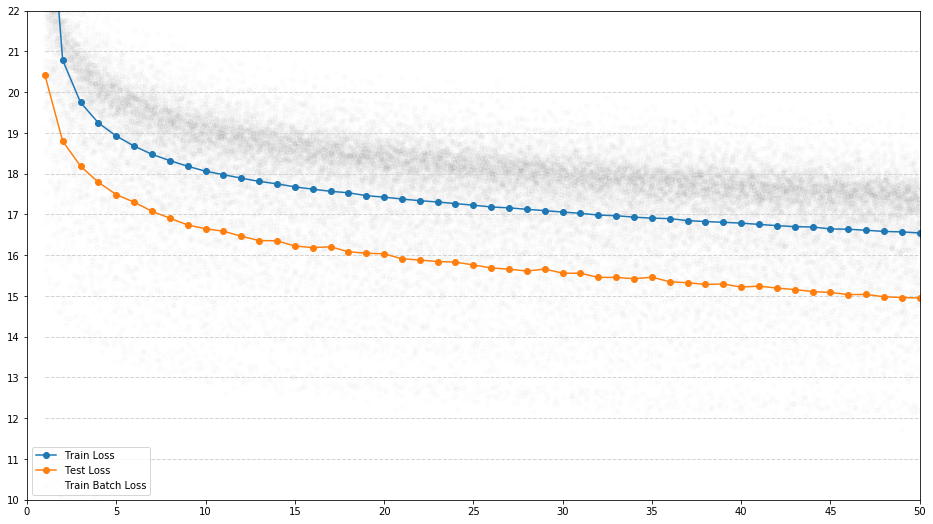

In [7]:
start = 1
end = len(train_batch_loss)
#end = 20
step = 1
y_ticks = np.arange(10, 22 + step, step)

# -------------------------------------------------------------------------------------

N = end - start + 1

train_batch_loss_np = np.array(train_batch_loss)[start:end+1].reshape(-1)

plt.figure(figsize=(16,9))
plt.ylim(y_ticks[0], y_ticks[-1])
plt.xlim(start, end)

x = np.arange(start, end+1, 1)
x_cont = np.linspace(start, end, train_batch_loss_np.shape[0])

plt.scatter(x_cont, train_batch_loss_np, label='Train Batch Loss', color = (0.0,0.0,0.0,0.007), s=20)
plt.plot(x, train_epoch_loss[start-1:end], label='Train Loss', marker='o')

#plt.plot(x, train_epoch_C0_acc[start-1:end], label='C0 Acc', marker='o')
#plt.plot(x, train_epoch_C1_acc[start-1:end], label='Train C1 Acc', marker='o')

plt.plot(x, test_loss[start-1:end], label='Test Loss', marker='o')
#plt.plot(x, test_C1_acc[start-1:end], label='Test C1 Acc', marker='o')


plt.hlines(y_ticks, start, end, color='lightgrey', linewidths=1, linestyles='dashed')

plt.xticks(np.arange(start-1,end+1,5).astype(int))
plt.yticks(y_ticks)

plt.legend(loc = 'lower left')

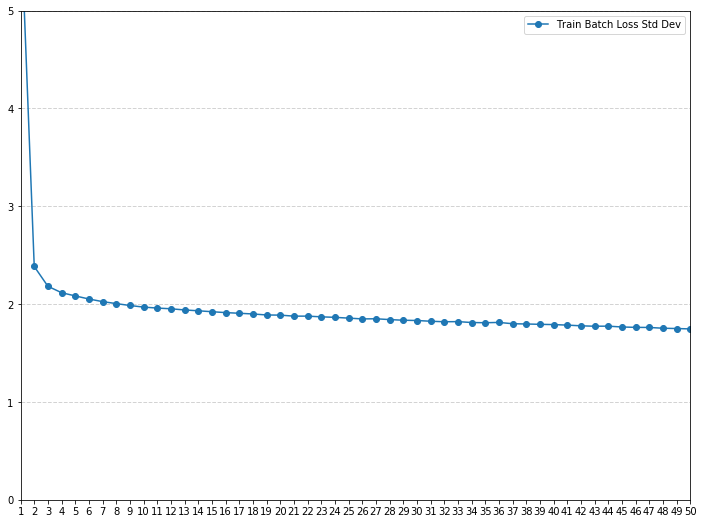

In [5]:
N = len(train_batch_loss)
step = 1
y_ticks = np.arange(0, 5 + step, step)

plt.figure(figsize=(12,9))
plt.ylim(y_ticks[0], y_ticks[-1])
plt.xlim(1,N)

plt.plot(1 + np.arange(0,N), np.std(np.array(train_batch_loss), axis = 1), label='Train Batch Loss Std Dev', marker='o')

plt.yticks(y_ticks)
plt.hlines(y_ticks, 1, N, color='lightgrey', linewidths=1, linestyles='dashed')
plt.xticks(np.arange(1,N+1).astype(int))
plt.legend(loc = 'upper right')